Project was a part of Programming Assignment.

Group Members ::

Sreya Dhar

Sumit Bawri

Abhilash Rajaram

Krishna Chaitanya

In [ ]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [ ]:
# Delete old database file

normalized_database_filename = 'normalized.db'
conn = create_connection(normalized_database_filename, delete_db=True)

In [ ]:
def create_facility_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_facility_sql = """ CREATE TABLE [Facility] (
        [Object_ID] Integer not null primary key,
        [Unit_ID] Text,
        [Fire_Bldg_ID] Text,
        [Building_ID] Text,
        [FMSS_ID] Text,
        [Community_ID] Text,
        [Global_ID] Text,
        [Create_Date] Text,
        [Edit_Date] Text,
        [Score] Integer,
        [Rating] Text
    ); """
        
    facilities = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            unit_id = line.split(',')[3]
            fire_building_id = line.split(',')[4]
            building_id = line.split(',')[5]
            fmss_id = line.split(',')[6]
            community_id = line.split(',')[7]
            global_id = line.split(',')[58]
            create_date = line.split(',')[57]
            edit_date = line.split(',')[56]
            score = line.split(',')[44]
            rating = line.split(',')[45]
            facility_tuple = (object_id,unit_id,fire_building_id,building_id,fmss_id,community_id,global_id,create_date,edit_date,score,rating)
            facilities.append(facility_tuple)
    
    def insert_facility(conn, values):
        sql =  """INSERT INTO Facility(Object_ID, Unit_ID, Fire_Bldg_ID, Building_ID, FMSS_ID, Community_ID, Global_ID,
                Create_Date, Edit_Date, Score, Rating) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_facility_sql, "Facility")
        insert_facility(conn, facilities)
        
    sql_statement = "select * from Facility"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)
    
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_facility_table(data_filename, normalized_database_filename)

Object_ID Unit_ID                            Fire_Bldg_ID  \
0              1   AZSAP  {6015F557-0D33-4FC7-A984-C813C43B2994}   
1              2   NMBAP  {898FD9CA-8C6C-4222-BC43-AE3B2602DDF4}   
2              3   AZCGP  {1C1746E5-A3D5-4A1B-A90A-F54EE821CF95}   
3              4   AZCGP  {6751BCDC-E4BA-4B62-B300-C5F266155773}   
4              5   AZCGP  {B3272E96-4C05-4640-BB0B-263CBB5A0F7A}   
...          ...     ...                                     ...   
44392      73169   MTGKP  {596D46C8-420C-4BB2-AB1D-DA9B795AA818}   
44393      73170   MTGKP  {4346F754-FDCD-4B52-8BFA-898C1ADB3D60}   
44394      73174   MTGKP  {224271C8-A5E6-42AA-A7B5-A44F27A57969}   
44395      73558   MTGKP  {82A80C8D-B80B-47C5-8825-E395A3280409}   
44396      73958   MTGKP  {163AF973-4BC2-4322-9FE0-66110D6D2CBA}   

                                  Building_ID  FMSS_ID  \
0                                                        
1      {896BC94C-D42E-4D16-A813-3B78863AA20F}    46721   
2      {80FAB141-7A6A-4DF5-8FFC-228061BD22A2}            
3      {90339201-D4B4-4766-B7A2-ED27504F3BDB}            
4      {2B3E66A5-7370-43E3-A947-8A0EC6C904B9}            
...                                       ...      ...   
44392                                                    
44393                                                    
44394                                                    
44395                                          No FMSS   
44396                                                    

                                 Community_ID  \
0                                               
1      {465E7E5A-6B1C-4F80-BAF3-71E002995D1D}   
2      {663E18C6-780A-4973-BF32-520302AD4580}   
3      {663E18C6-780A-4973-BF32-520302AD4580}   
4      {663E18C6-780A-4973-BF32-520302AD4580}   
...                                       ...   
44392  {CF823C6A-546F-4A0F-A637-A4104EC6C837}   
44393                                           
44394                                           
44395                                           
44396  {CF823C6A-546F-4A0F-A637-A4104EC6C837}   

                                    Global_ID             Create_Date  \
0      {CE5AE3C5-159C-4044-8B21-6CBB48C82FA5}  2013/02/01 13:15:28+00   
1      {D4D782EE-2317-489A-A190-BCA4E18AD398}  1970/01/01 00:00:00+00   
2      {46352A0A-2C93-4AEF-865D-BEECC204A522}  1970/01/01 00:00:00+00   
3      {499B63A1-F251-45EB-839D-F0390BEF84A8}  1970/01/01 00:00:00+00   
4      {851F4C2B-A2A3-4188-9885-6F4E4CE49461}  1970/01/01 00:00:00+00   
...                                       ...                     ...   
44392  {A22AE299-D65F-4ED8-9FD2-F738D858970D}  2020/09/25 17:37:54+00   
44393  {E1625D66-D0EB-4ADB-AE65-6359A087089F}  2020/09/25 17:45:14+00   
44394  {8C5915E5-E631-4DB4-A90F-60DFD3C62F52}  2020/09/25 18:32:26+00   
44395  {A91AB18A-D96A-4355-A4F7-448DA367AD36}  2020/09/25 18:43:43+00   
44396  {BF94FA4F-B90D-4625-8F89-D9322636D7B8}  2020/09/29 17:25:19+00   

                    Edit_Date Score        Rating  
0      2019/03/28 13:27:59+00    89          High  
1      2017/08/02 17:44:20+00        Not Surveyed  
2      2019/08/19 22:28:18+00    47      Moderate  
3      2019/08/19 22:28:18+00    15           Low  
4      2019/08/19 22:28:18+00    15           Low  
...                       ...   ...           ...  
44392  2020/10/02 17:59:41+00    71          High  
44393  2020/10/02 17:59:41+00    54      Moderate  
44394  2020/10/02 17:59:41+00    56      Moderate  
44395  2020/10/02 17:59:41+00    52      Moderate  
44396  2020/10/02 17:59:41+00    40           Low  

[44397 rows x 11 columns]

In [ ]:
def create_facility_info_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_facility_info_sql = """ CREATE TABLE [Facility_Info] (
        [Object_ID] Integer not null primary key,
        [Common_Name] Text,
        [Owner] Text,
        [FacilityType] Text,
        [FacilityUse] Text,
        [BuildingOccupied] Text,
        [Restriction] Text,
        [Community_ID] Text,
        [Last_Site_Visit_Date] Text,
        [F_AccProScore] Integer,
        [C_AccProScore] Integer,
        [AssessScale] Text,
        [CommunityName] Text,
        FOREIGN KEY(Object_ID) REFERENCES Facility(Object_ID)
    ); """
        
    facility_info_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            common_name = line.split(',')[9]
            owner = line.split(',')[11]
            facility_type = line.split(',')[12]
            facility_use = line.split(',')[13]
            building_occupied = line.split(',')[14]
            restriction = line.split(',')[64]
            community_id = line.split(',')[7]
            last_visited_date = line.split(',')[16]
            facility_access_protection_score = line.split(',')[43]
            community_access_protection_score = line.split(',')[42]
            assess_scale = line.split(',')[8]
            community_name = line.split(',')[15]
            facility_info_tuple = (object_id,common_name,owner,facility_type,facility_use,building_occupied,restriction,community_id,last_visited_date,facility_access_protection_score,community_access_protection_score,assess_scale,community_name)
            facility_info_list.append(facility_info_tuple)
    
    def insert_facility_info(conn, values):
        sql =  """INSERT INTO Facility_Info(Object_ID, Common_Name, Owner, FacilityType, FacilityUse, BuildingOccupied, 
                Restriction, Community_ID, Last_Site_Visit_Date, F_AccProScore, C_AccProScore, AssessScale,CommunityName) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_facility_info_sql, "Facility_Info")
        insert_facility_info(conn, facility_info_list)
        
    sql_statement = "select * from Facility_Info;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_facility_info_table(data_filename, normalized_database_filename)

Object_ID                          Common_Name Owner      FacilityType  \
0              1             Grass Shack vault toilet   NPS             Other   
1              2                    WR 44 OLD HOUSING   NPS          Building   
2              3                      Shade Structure   NPS             Shade   
3              4                       Picnic Shelter   NPS             Shade   
4              5                       Picnic Shelter   NPS             Shade   
...          ...                                  ...   ...               ...   
44392      73169         Box & Cattle Cars (Railroad)   NPS             Other   
44393      73170                             Hay Pile   NPS             Other   
44394      73174                     Jenkins Hay Lift   NPS  CulturalResource   
44395      73558                       West Hay Stack   NPS             Other   
44396      73958  HS-57 Siphon (near railroad tracks)   NPS           Utility   

         FacilityUse BuildingOccupied Restriction  \
0             Public                N         UNR   
1          Residence                Y         UNR   
2             Public                N         UNR   
3             Public                N         UNR   
4             Public                N         UNR   
...              ...              ...         ...   
44392  NotApplicable                N         UNR   
44393  NotApplicable                N         UNR   
44394  NotApplicable                N         UNR   
44395  NotApplicable                N         UNR   
44396  NotApplicable                N         UNR   

                                 Community_ID    Last_Site_Visit_Date  \
0                                              2013/02/01 13:30:41+00   
1      {465E7E5A-6B1C-4F80-BAF3-71E002995D1D}  2008/12/14 00:00:00+00   
2      {663E18C6-780A-4973-BF32-520302AD4580}  2019/06/13 14:02:17+00   
3      {663E18C6-780A-4973-BF32-520302AD4580}  2018/03/13 13:46:48+00   
4      {663E18C6-780A-4973-BF32-520302AD4580}  2018/03/13 13:50:03+00   
...                                       ...                     ...   
44392  {CF823C6A-546F-4A0F-A637-A4104EC6C837}  2019/09/16 06:00:00+00   
44393                                          2019/09/17 06:00:00+00   
44394                                          2019/09/17 06:00:00+00   
44395                                          2019/09/17 06:00:00+00   
44396  {CF823C6A-546F-4A0F-A637-A4104EC6C837}  2019/09/17 06:00:00+00   

      F_AccProScore C_AccProScore AssessScale                  CommunityName  
0                                           N                                 
1                              37           Y                Frijoles Canyon  
2                               8           Y  Casa Grande National Monument  
3                               8           Y  Casa Grande National Monument  
4                               8           Y  Casa Grande National Monument  
...             ...           ...         ...                            ...  
44392                           9           N                Visitors Center  
44393                                       N                                 
44394                                       N                                 
44395                                       N                                 
44396                           9           Y                Visitors Center  

[44397 rows x 13 columns]

In [ ]:
def create_facility_location_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_facility_location_sql = """ CREATE TABLE [Facility_Location] (
        [Object_ID] integer not null primary key, 
        [Location] text,
        [Region_Code] text,
        [Group_Code] text,
        [Data_Source] text,
        [Latitude] real,
        [Longitude] real,
        FOREIGN KEY(Object_ID) REFERENCES Facility(Object_ID)
    ); """
        
    facility_location_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            location = line.split(',')[17]
            region_code = line.split(',')[52]
            group_code = line.split(',')[53]
            data_source = line.split(',')[55]
            latitude = line.split(',')[1]
            longitude = line.split(',')[0]
            facility_location_tuple = (object_id,location,region_code,group_code,data_source,latitude,longitude)
            facility_location_list.append(facility_location_tuple)
    
    def insert_facility_location(conn, values):
        sql =  """INSERT INTO Facility_Location(Object_ID, Location, Region_Code, Group_Code, 
                Data_Source, Latitude, Longitude) VALUES (?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_facility_location_sql, "Facility_Location")
        insert_facility_location(conn, facility_location_list)
        
    sql_statement = "select * from Facility_Location;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_facility_location_table(data_filename, normalized_database_filename)

Object_ID                        Location Region_Code Group_Code  \
0              1                            SAGU         IMR       SAGU   
1              2  Headquarters / Visitors Center         IMR       BAND   
2              3                            CAGR         IMR       CAGR   
3              4                            CAGR         IMR       CAGR   
4              5                            CAGR         IMR       CAGR   
...          ...                             ...         ...        ...   
44392      73169                 Visitors Center         IMR              
44393      73170                     Grant Kohrs         IMR              
44394      73174                     Grant Kohrs         IMR              
44395      73558       West field of Grant Kohrs         IMR              
44396      73958                 Visitors Center         IMR              

                                  Data_Source Latitude Longitude  
0                                         GPS  32.1838  -110.592  
1                                     Unknown  35.7719  -106.266  
2      ArcGIS feature to point tool was used.  32.9944  -111.537  
3      ArcGIS feature to point tool was used.  32.9956  -111.536  
4      ArcGIS feature to point tool was used.  32.9958  -111.536  
...                                       ...      ...       ...  
44392                                          46.4098  -112.738  
44393                                          46.4066  -112.741  
44394                                          46.4144  -112.753  
44395                                          46.4042  -112.747  
44396                                           46.408  -112.738  

[44397 rows x 7 columns]

In [ ]:
def create_community_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_community_sql = """ CREATE TABLE [Community] (
        [Index] integer not null primary key,
        [Community_ID] Text,
        [Community_Name] Text,
        [C_AccProScore] Integer
    ); """
        
    community_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            community_id = line.split(',')[7]
            community_id = community_id.replace('{', '').replace('}', '').strip()
            community_name = line.split(',')[15]
            community_access_protection_score = line.split(',')[42]
            for ele1, ele2, ele3 in zip(community_id, community_name, community_access_protection_score):
                if ele1 == '' and ele2 == '' and ele3 == '':
                    continue
                community_tuple = (community_id, community_name,community_access_protection_score)
                if community_tuple not in community_list:
                    community_list.append(community_tuple)
    
    def insert_community(conn, values):
        sql = "INSERT INTO Community(Community_ID,  Community_Name, C_AccProScore) VALUES ( ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_community_sql, "Community")
        insert_community(conn, community_list)
        
    sql_statement = "select * from Community;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_community_table(data_filename, normalized_database_filename)

Index                          Community_ID  \
0         1  465E7E5A-6B1C-4F80-BAF3-71E002995D1D   
1         2  663E18C6-780A-4973-BF32-520302AD4580   
2         3  02516607-DDE7-4FB8-92E6-4B961123BA97   
3         4  8070EA3D-AB58-4108-A41F-E622221484ED   
4         5  8070EA3D-AB58-4108-A41F-E622221484ED   
...     ...                                   ...   
1154   1155  398B737B-C7D6-4A4C-90E5-DA742EFB92F9   
1155   1156  25F9F997-15E0-4A67-A80D-3BA5D148EFF5   
1156   1157  6750ABA2-C7F7-4404-A68E-806F14250814   
1157   1158  9D3A98D8-9C18-4F2E-95EC-777530E824FC   
1158   1159  9D3A98D8-9C18-4F2E-95EC-777530E824FC   

                     Community_Name  C_AccProScore  
0                   Frijoles Canyon             37  
1     Casa Grande National Monument              8  
2                  Montezuma Castle             15  
3                    Montezuma Well             24  
4                    Montezuma Well             23  
...                             ...            ...  
1154           Maintenance Facility             18  
1155      Aialik Bay Ranger Station             37  
1156  Harkers Island Visitor Center             14  
1157                Shaefer Complex             28  
1158          Shaefer Cabin Complex             28  

[1159 rows x 4 columns]

In [ ]:
def create_access_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_access_sql = """ CREATE TABLE [Access] (
        [Object_ID] Integer not null primary key,
        [PrimaryAccess] Text,
        [IngressEgress] Integer,
        [AccessWidth] Integer,
        [AccessCond] Integer,
        [BridgeCond] Integer,
        [Turnaround] Integer,
        [BldgNum] Integer
    ); """
        
    access_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            primary_access = line.split(',')[18]
            ingress_egress = line.split(',')[19]
            access_width = line.split(',')[20]
            access_condition = line.split(',')[21]
            bridge_condition = line.split(',')[22]
            turn_around = line.split(',')[23]
            building_number = line.split(',')[24]
            access_tuple = (object_id,primary_access,ingress_egress,access_width,access_condition,bridge_condition,turn_around,building_number)
            access_list.append(access_tuple)
    
    def insert_access(conn, values):
        sql =  "INSERT INTO Access(Object_ID, PrimaryAccess, IngressEgress, AccessWidth, AccessCond, BridgeCond, Turnaround, BldgNum) VALUES (?, ?, ?, ?, ?, ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_access_sql, "Access")
        insert_access(conn, access_list)
        
    sql_statement = "select * from Access;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_access_table(data_filename, normalized_database_filename)

Object_ID PrimaryAccess IngressEgress AccessWidth AccessCond  \
0              1          Foot             7           4          7   
1              2          Road             6           0          2   
2              3          Road             6           2          0   
3              4          Road             6           2          0   
4              5          Road             6           2          0   
...          ...           ...           ...         ...        ...   
44392      73169          Road             6           3          3   
44393      73170          Road             6           3          3   
44394      73174          Road             0           3          0   
44395      73558          Road             0           3          3   
44396      73958          Road                                        

      BridgeCond Turnaround BldgNum  
0              0          4       4  
1              3          2       0  
2              0          0       0  
3              0          0       0  
4              0          0       0  
...          ...        ...     ...  
44392          0          1       4  
44393          0          1       4  
44394          0          1       4  
44395          0          1       4  
44396                                

[44397 rows x 8 columns]

In [ ]:
def create_envt_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_envt_sql = """ CREATE TABLE [Environment] (
        [Object_ID] Integer not null primary key,
        [FuelLoad] Integer,
        [FuelType] Integer,
        [DefensibleSpace] Integer,
        [Topography] Integer
    ); """
        
    envt_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            fuel_load = line.split(',')[25]
            fuel_type = line.split(',')[26]
            defensible_space = line.split(',')[27]
            topography = line.split(',')[28]
            envt_tuple = (object_id,fuel_load,fuel_type,defensible_space,topography)
            envt_list.append(envt_tuple)
    
    def insert_envt(conn, values):
        sql =  "INSERT INTO Environment(Object_ID, FuelLoad, FuelType, DefensibleSpace, Topography) VALUES (?, ?, ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_envt_sql, "Environment")
        insert_envt(conn, envt_list)
        
    sql_statement = "select * from Environment;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_envt_table(data_filename, normalized_database_filename)

Object_ID FuelLoad FuelType DefensibleSpace Topography
0              1       10        6              25          4
1              2       10       10              10          4
2              3        0        6               1          0
3              4        0        6               1          0
4              5        0        6               1          0
...          ...      ...      ...             ...        ...
44392      73169        0        4              25          0
44393      73170        0        4              25          0
44394      73174        4        4              25          4
44395      73558        4        4              25          0
44396      73958        4        4              20          0

[44397 rows x 5 columns]

In [ ]:
def create_structure_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_structure_sql = """ CREATE TABLE [Structure] (
        [Object_ID] Integer not null primary key,
        [RoofMat] Integer,
        [SidingMat] Integer,
        [Foundation] Integer,
        [Fencing] Integer,
        [Firewood] Integer
    ); """
        
    structures = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            roof_material = line.split(',')[29]
            siding_material = line.split(',')[30]
            foundation = line.split(',')[31]
            fencing = line.split(',')[32]
            firewood = line.split(',')[33]
            structure_tuple = (object_id,roof_material,siding_material,foundation,fencing,firewood)
            structures.append(structure_tuple)
    
    def insert_structure(conn, values):
        sql =  "INSERT INTO Structure(Object_ID, RoofMat, SidingMat, Foundation, Fencing, Firewood) VALUES (?, ?, ?, ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_structure_sql, "Structure")
        insert_structure(conn, structures)
        
    sql_statement = "select * from Structure;"
    df = pd.read_sql_query(sql_statement, conn)
    # display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_structure_table(data_filename, normalized_database_filename)

In [ ]:
def create_protection_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_protection_sql = """ CREATE TABLE [Protection] (
        [Object_ID] Integer not null primary key,
        [Propane] Integer,
        [Hazmat] Text,
        [WaterSupply] Integer,
        [OverheadHaz] Integer,
        [SafetyZone] Integer,
        [SZRadius] Integer,
        [Obstacles] Integer,
        [TriageCategory] Text,
        [ProtectionLevel] Text,
        [ResourcesOfConcern] Text
    ); """
        
    protection_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            propane = line.split(',')[34]
            hazardous_material = line.split(',')[35]
            water_supply = line.split(',')[36]
            overhead_hazards = line.split(',')[37]
            safety_zones = line.split(',')[38]
            safety_zone_radius = line.split(',')[39]
            obstacles = line.split(',')[40]
            triage_category = line.split(',')[41]
            protection_level = line.split(',')[46]
            resources_of_concern = line.split(',')[49]
            protection_tuple = (object_id,propane,hazardous_material,water_supply,overhead_hazards,safety_zones,safety_zone_radius,obstacles,triage_category,protection_level,resources_of_concern)
            protection_list.append(protection_tuple)
    
    def insert_protection(conn, values):
        sql =  """INSERT INTO Protection(Object_ID, Propane, Hazmat, WaterSupply, OverheadHaz, SafetyZone,
                SZRadius, Obstacles, TriageCategory, ProtectionLevel, ResourcesOfConcern) 
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_protection_sql, "Protection")
        insert_protection(conn, protection_list)
        
    sql_statement = "select * from Protection;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_protection_table(data_filename, normalized_database_filename)

Object_ID Propane Hazmat WaterSupply OverheadHaz SafetyZone SZRadius  \
0              1       0     NA          10           0          3            
1              2                         10           3          3            
2              3                          0           0          0            
3              4                          0           0          0            
4              5                          0           0          0            
...          ...     ...    ...         ...         ...        ...      ...   
44392      73169       0                  3           0          0      100   
44393      73170       0                  3           0          0      100   
44394      73174       0                  3           0          0      100   
44395      73558       0                  3           0          0      100   
44396      73958       0                                         0      100   

      Obstacles TriageCategory ProtectionLevel ResourcesOfConcern  
0             0                 Not Designated            Unknown  
1             3                 Not Designated            Unknown  
2             0       PrepHold  Not Designated            Unknown  
3             0       PrepHold  Not Designated            Unknown  
4             0       PrepHold  Not Designated            Unknown  
...         ...            ...             ...                ...  
44392         0       PrepHold                                Yes  
44393         0       PrepHold                                 No  
44394         0       PrepHold                                Yes  
44395         0       PrepHold                                 No  
44396                PrepLeave                                Yes  

[44397 rows x 11 columns]

In [ ]:
sql_statement = """ Select * From Facility_Location
                        INNER JOIN Facility_Info USING(Object_ID)
                        INNER JOIN Access USING(Object_ID)
                        INNER JOIN Environment USING(Object_ID) 
                        INNER JOIN Structure USING(Object_ID)
                        INNER JOIN Protection USING(Object_ID)
                        INNER JOIN Facility USING(Object_ID)
                        
                        """
df = pd.read_sql_query(sql_statement, conn)
df.head()

Object_ID                        Location Region_Code Group_Code  \
0          1                            SAGU         IMR       SAGU   
1          2  Headquarters / Visitors Center         IMR       BAND   
2          3                            CAGR         IMR       CAGR   
3          4                            CAGR         IMR       CAGR   
4          5                            CAGR         IMR       CAGR   

                              Data_Source Latitude Longitude  \
0                                     GPS  32.1838  -110.592   
1                                 Unknown  35.7719  -106.266   
2  ArcGIS feature to point tool was used.  32.9944  -111.537   
3  ArcGIS feature to point tool was used.  32.9956  -111.536   
4  ArcGIS feature to point tool was used.  32.9958  -111.536   

                Common_Name Owner FacilityType  ... Unit_ID  \
0  Grass Shack vault toilet   NPS        Other  ...   AZSAP   
1         WR 44 OLD HOUSING   NPS     Building  ...   NMBAP   
2           Shade Structure   NPS        Shade  ...   AZCGP   
3            Picnic Shelter   NPS        Shade  ...   AZCGP   
4            Picnic Shelter   NPS        Shade  ...   AZCGP   

                             Fire_Bldg_ID  \
0  {6015F557-0D33-4FC7-A984-C813C43B2994}   
1  {898FD9CA-8C6C-4222-BC43-AE3B2602DDF4}   
2  {1C1746E5-A3D5-4A1B-A90A-F54EE821CF95}   
3  {6751BCDC-E4BA-4B62-B300-C5F266155773}   
4  {B3272E96-4C05-4640-BB0B-263CBB5A0F7A}   

                              Building_ID FMSS_ID  \
0                                                   
1  {896BC94C-D42E-4D16-A813-3B78863AA20F}   46721   
2  {80FAB141-7A6A-4DF5-8FFC-228061BD22A2}           
3  {90339201-D4B4-4766-B7A2-ED27504F3BDB}           
4  {2B3E66A5-7370-43E3-A947-8A0EC6C904B9}           

                             Community_ID  \
0                                           
1  {465E7E5A-6B1C-4F80-BAF3-71E002995D1D}   
2  {663E18C6-780A-4973-BF32-520302AD4580}   
3  {663E18C6-780A-4973-BF32-520302AD4580}   
4  {663E18C6-780A-4973-BF32-520302AD4580}   

                                Global_ID             Create_Date  \
0  {CE5AE3C5-159C-4044-8B21-6CBB48C82FA5}  2013/02/01 13:15:28+00   
1  {D4D782EE-2317-489A-A190-BCA4E18AD398}  1970/01/01 00:00:00+00   
2  {46352A0A-2C93-4AEF-865D-BEECC204A522}  1970/01/01 00:00:00+00   
3  {499B63A1-F251-45EB-839D-F0390BEF84A8}  1970/01/01 00:00:00+00   
4  {851F4C2B-A2A3-4188-9885-6F4E4CE49461}  1970/01/01 00:00:00+00   

                Edit_Date Score        Rating  
0  2019/03/28 13:27:59+00    89          High  
1  2017/08/02 17:44:20+00        Not Surveyed  
2  2019/08/19 22:28:18+00    47      Moderate  
3  2019/08/19 22:28:18+00    15           Low  
4  2019/08/19 22:28:18+00    15           Low  

[5 rows x 55 columns]

In [ ]:
#@title
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error as MSE
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.model_selection import cross_val_score
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import matplotlib
%matplotlib inline

In [ ]:
# # %% # Checking for missing values
# df[df[:]=='NaN']

In [ ]:
df.head()

Object_ID                        Location Region_Code Group_Code  \
0          1                            SAGU         IMR       SAGU   
1          2  Headquarters / Visitors Center         IMR       BAND   
2          3                            CAGR         IMR       CAGR   
3          4                            CAGR         IMR       CAGR   
4          5                            CAGR         IMR       CAGR   

                              Data_Source Latitude Longitude  \
0                                     GPS  32.1838  -110.592   
1                                 Unknown  35.7719  -106.266   
2  ArcGIS feature to point tool was used.  32.9944  -111.537   
3  ArcGIS feature to point tool was used.  32.9956  -111.536   
4  ArcGIS feature to point tool was used.  32.9958  -111.536   

                Common_Name Owner FacilityType  ... Unit_ID  \
0  Grass Shack vault toilet   NPS        Other  ...   AZSAP   
1         WR 44 OLD HOUSING   NPS     Building  ...   NMBAP   
2           Shade Structure   NPS        Shade  ...   AZCGP   
3            Picnic Shelter   NPS        Shade  ...   AZCGP   
4            Picnic Shelter   NPS        Shade  ...   AZCGP   

                             Fire_Bldg_ID  \
0  {6015F557-0D33-4FC7-A984-C813C43B2994}   
1  {898FD9CA-8C6C-4222-BC43-AE3B2602DDF4}   
2  {1C1746E5-A3D5-4A1B-A90A-F54EE821CF95}   
3  {6751BCDC-E4BA-4B62-B300-C5F266155773}   
4  {B3272E96-4C05-4640-BB0B-263CBB5A0F7A}   

                              Building_ID FMSS_ID  \
0                                                   
1  {896BC94C-D42E-4D16-A813-3B78863AA20F}   46721   
2  {80FAB141-7A6A-4DF5-8FFC-228061BD22A2}           
3  {90339201-D4B4-4766-B7A2-ED27504F3BDB}           
4  {2B3E66A5-7370-43E3-A947-8A0EC6C904B9}           

                             Community_ID  \
0                                           
1  {465E7E5A-6B1C-4F80-BAF3-71E002995D1D}   
2  {663E18C6-780A-4973-BF32-520302AD4580}   
3  {663E18C6-780A-4973-BF32-520302AD4580}   
4  {663E18C6-780A-4973-BF32-520302AD4580}   

                                Global_ID             Create_Date  \
0  {CE5AE3C5-159C-4044-8B21-6CBB48C82FA5}  2013/02/01 13:15:28+00   
1  {D4D782EE-2317-489A-A190-BCA4E18AD398}  1970/01/01 00:00:00+00   
2  {46352A0A-2C93-4AEF-865D-BEECC204A522}  1970/01/01 00:00:00+00   
3  {499B63A1-F251-45EB-839D-F0390BEF84A8}  1970/01/01 00:00:00+00   
4  {851F4C2B-A2A3-4188-9885-6F4E4CE49461}  1970/01/01 00:00:00+00   

                Edit_Date Score        Rating  
0  2019/03/28 13:27:59+00    89          High  
1  2017/08/02 17:44:20+00        Not Surveyed  
2  2019/08/19 22:28:18+00    47      Moderate  
3  2019/08/19 22:28:18+00    15           Low  
4  2019/08/19 22:28:18+00    15           Low  

[5 rows x 55 columns]

In [ ]:
df.shape

(44397, 55)

In [ ]:
# Printing the types of data in the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44397 entries, 0 to 44396
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Object_ID             44397 non-null  int64 
 1   Location              44397 non-null  object
 2   Region_Code           44397 non-null  object
 3   Group_Code            44397 non-null  object
 4   Data_Source           44397 non-null  object
 5   Latitude              44397 non-null  object
 6   Longitude             44397 non-null  object
 7   Common_Name           44397 non-null  object
 8   Owner                 44397 non-null  object
 9   FacilityType          44397 non-null  object
 10  FacilityUse           44397 non-null  object
 11  BuildingOccupied      44397 non-null  object
 12  Restriction           44397 non-null  object
 13  Community_ID          44397 non-null  object
 14  Last_Site_Visit_Date  44397 non-null  object
 15  F_AccProScore         44397 non-null

In [ ]:
df=df[['Latitude', 'Longitude', 'AssessScale', 'Common_Name', 'Owner', 'FacilityType', 'FacilityUse', 'BuildingOccupied', 'CommunityName', 'Last_Site_Visit_Date', 'Location', 'PrimaryAccess', 'IngressEgress', 'AccessWidth', 'AccessCond', 'BridgeCond', 'Turnaround', 'BldgNum', 'FuelLoad',	'FuelType',	'DefensibleSpace',	'Topography',	'RoofMat',	'SidingMat',	'Foundation',	'Fencing',	'Firewood',	'Propane',	'Hazmat',	'WaterSupply',	'OverheadHaz',	'SafetyZone',	'SZRadius',	'Obstacles',	'TriageCategory', 'C_AccProScore',	'F_AccProScore',  'Score',	'Rating']]

df.head()
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44397 entries, 0 to 44396
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Latitude              44397 non-null  object
 1   Longitude             44397 non-null  object
 2   AssessScale           44397 non-null  object
 3   Common_Name           44397 non-null  object
 4   Owner                 44397 non-null  object
 5   FacilityType          44397 non-null  object
 6   FacilityUse           44397 non-null  object
 7   BuildingOccupied      44397 non-null  object
 8   CommunityName         44397 non-null  object
 9   Last_Site_Visit_Date  44397 non-null  object
 10  Location              44397 non-null  object
 11  PrimaryAccess         44397 non-null  object
 12  IngressEgress         44397 non-null  object
 13  AccessWidth           44397 non-null  object
 14  AccessCond            44397 non-null  object
 15  BridgeCond            44397 non-null

In [ ]:
# replace field that's entirely space (or empty) with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.head()

Latitude   Longitude AssessScale               Common_Name Owner  \
0  32.183823 -110.592244           N  Grass Shack vault toilet   NPS   
1  35.771942 -106.265777           Y         WR 44 OLD HOUSING   NPS   
2  32.994448 -111.537037           Y           Shade Structure   NPS   
3  32.995553 -111.536253           Y            Picnic Shelter   NPS   
4  32.995787 -111.536455           Y            Picnic Shelter   NPS   

  FacilityType FacilityUse BuildingOccupied                  CommunityName  \
0        Other      Public                N                            NaN   
1     Building   Residence                Y                Frijoles Canyon   
2        Shade      Public                N  Casa Grande National Monument   
3        Shade      Public                N  Casa Grande National Monument   
4        Shade      Public                N  Casa Grande National Monument   

     Last_Site_Visit_Date  ... WaterSupply OverheadHaz  SafetyZone  SZRadius  \
0  2013/02/01 13:30:41+00  ...        10.0         0.0         3.0       NaN   
1  2008/12/14 00:00:00+00  ...        10.0         3.0         3.0       NaN   
2  2019/06/13 14:02:17+00  ...         0.0         0.0         0.0       NaN   
3  2018/03/13 13:46:48+00  ...         0.0         0.0         0.0       NaN   
4  2018/03/13 13:50:03+00  ...         0.0         0.0         0.0       NaN   

   Obstacles  TriageCategory  C_AccProScore  F_AccProScore  Score  \
0        0.0             NaN            NaN            NaN   89.0   
1        3.0             NaN           37.0            NaN    NaN   
2        0.0        PrepHold            8.0            NaN   47.0   
3        0.0        PrepHold            8.0            NaN   15.0   
4        0.0        PrepHold            8.0            NaN   15.0   

         Rating  
0          High  
1  Not Surveyed  
2      Moderate  
3           Low  
4           Low  

[5 rows x 39 columns]

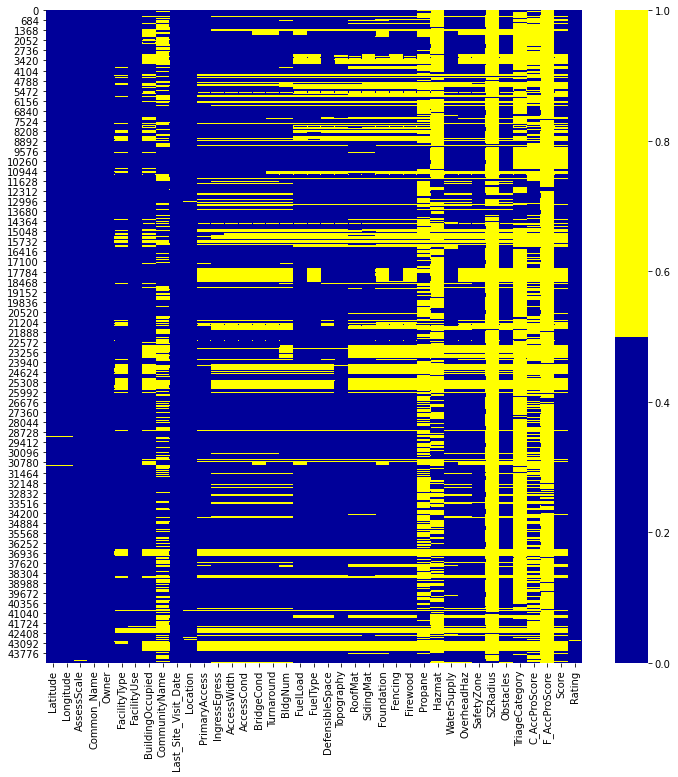

In [ ]:
# %% Missing Data Heatmap
plt.figure(figsize=(12,12))
cols = df.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# %% # if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Latitude - 0.0%
Longitude - 0.0%
AssessScale - 0.0%
Common_Name - 0.0%
Owner - 0.0%
FacilityType - 12.0%
FacilityUse - 1.0%
BuildingOccupied - 21.0%
CommunityName - 40.0%
Last_Site_Visit_Date - 0.0%
Location - 0.0%
PrimaryAccess - 14.0%
IngressEgress - 20.0%
AccessWidth - 20.0%
AccessCond - 20.0%
BridgeCond - 22.0%
Turnaround - 22.0%
BldgNum - 24.0%
FuelLoad - 20.0%
FuelType - 20.0%
DefensibleSpace - 18.0%
Topography - 15.0%
RoofMat - 23.0%
SidingMat - 23.0%
Foundation - 29.0%
Fencing - 26.0%
Firewood - 27.0%
Propane - 65.0%
Hazmat - 72.0%
WaterSupply - 23.0%
OverheadHaz - 27.0%
SafetyZone - 24.0%
SZRadius - 95.0%
Obstacles - 27.0%
TriageCategory - 82.0%
C_AccProScore - 57.0%
F_AccProScore - 96.0%
Score - 32.0%
Rating - 0.0%


In [ ]:
print(df.isna().sum())

Latitude                   98
Longitude                  98
AssessScale                55
Common_Name                27
Owner                      51
FacilityType             5468
FacilityUse               567
BuildingOccupied         9446
CommunityName           17925
Last_Site_Visit_Date        0
Location                  187
PrimaryAccess            6249
IngressEgress            8867
AccessWidth              8980
AccessCond               8983
BridgeCond               9629
Turnaround               9596
BldgNum                 10556
FuelLoad                 8775
FuelType                 9068
DefensibleSpace          8022
Topography               6509
RoofMat                 10100
SidingMat               10221
Foundation              12674
Fencing                 11324
Firewood                12034
Propane                 28894
Hazmat                  31849
WaterSupply             10044
OverheadHaz             11801
SafetyZone              10809
SZRadius                42313
Obstacles 

In [ ]:
#Import Library
import folium
#import xlrd
#assert xlrd.__version__>= '1'
from folium.plugins import MarkerCluster

import pandas as pd
import numpy as np

In [ ]:
df.dropna(subset = ["Latitude", "Longitude", "Score", "Rating"], inplace=True)
df.shape

(30105, 39)

In [ ]:
latitude = df['Latitude']
longitude = df['Longitude']
score = df['Score']
# Create base map
map = folium.Map(location=[32.99, -111.536 ], zoom_start = 6, control_scale=True)

In [ ]:
df['Rating'].count()

30105

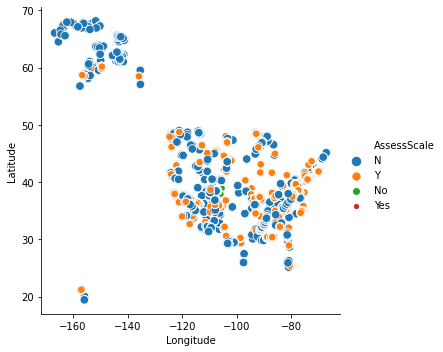

In [ ]:
sns.relplot(x="Longitude", y="Latitude", hue="AssessScale", size="AssessScale", data=df);

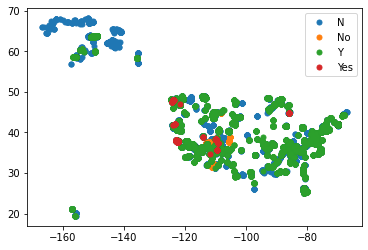

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('AssessScale')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

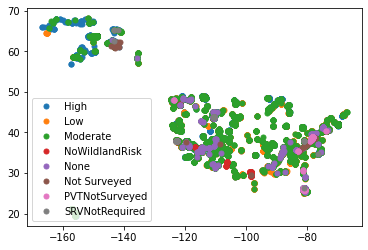

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('Rating')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

In [ ]:
#!pip install chart-studio

In [ ]:
import plotly
# import chart_studio.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [ ]:
import pandas as pd
coords = pd.concat([df['Latitude'], df['Longitude'], df['Score']], axis=1)
coords = coords.sample(frac=0.1, replace=True)
cases = []
colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']


In [ ]:
from plotly.offline import init_notebook_mode, iplot

In [ ]:
# %% Checking the data type
print(df.dtypes)

Latitude                float64
Longitude               float64
AssessScale              object
Common_Name              object
Owner                    object
FacilityType             object
FacilityUse              object
BuildingOccupied         object
CommunityName            object
Last_Site_Visit_Date     object
Location                 object
PrimaryAccess            object
IngressEgress           float64
AccessWidth             float64
AccessCond              float64
BridgeCond              float64
Turnaround              float64
BldgNum                 float64
FuelLoad                float64
FuelType                float64
DefensibleSpace         float64
Topography              float64
RoofMat                 float64
SidingMat               float64
Foundation              float64
Fencing                 float64
Firewood                float64
Propane                 float64
Hazmat                   object
WaterSupply             float64
OverheadHaz             float64
SafetyZo

In [ ]:
df.describe().shape ## shape of dataset (30105, 39)
df.describe()

Latitude     Longitude  IngressEgress   AccessWidth    AccessCond  \
count  30105.000000  30105.000000   28676.000000  28689.000000  28687.000000   
mean      40.300291   -102.061106       3.995257      1.556415      1.727751   
std        7.201867     20.943908       2.937485      1.458586      2.288595   
min       19.417794   -166.821219       0.000000      0.000000      0.000000   
25%       36.198764   -116.158500       0.000000      0.000000      0.000000   
50%       38.592756   -109.764278       6.000000      2.000000      0.000000   
75%       43.783041    -81.265018       6.000000      3.000000      3.000000   
max       68.142401    -67.134027       7.000000      4.000000      7.000000   

         BridgeCond    Turnaround       BldgNum      FuelLoad      FuelType  \
count  28141.000000  28398.000000  28700.000000  29561.000000  30092.000000   
mean       0.077503      0.920241      1.545784      3.727073      7.984979   
std        0.426552      1.293719      1.947773      3.588680      2.517462   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      6.000000   
50%        0.000000      0.000000      0.000000      4.000000     10.000000   
75%        0.000000      2.000000      4.000000      4.000000     10.000000   
max        3.000000      4.000000      4.000000     13.000000     12.000000   

       ...      Firewood       Propane   WaterSupply   OverheadHaz  \
count  ...  30053.000000  12284.000000  28221.000000  28036.000000   
mean   ...      0.219213      0.165907      2.812728      0.368419   
std    ...      0.702381      0.546605      3.492197      0.984662   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      3.000000      0.000000   
75%    ...      0.000000      0.000000      3.000000      0.000000   
max    ...      3.000000      5.000000     10.000000      3.000000   

         SafetyZone     SZRadius     Obstacles  C_AccProScore  F_AccProScore  \
count  28979.000000  2029.000000  28037.000000   18104.000000    1812.000000   
mean       0.697022   269.329719      0.689410      15.382678       8.779249   
std        1.266997   216.437724      1.262142       8.664985      14.051646   
min        0.000000    -1.000000      0.000000       0.000000       0.000000   
25%        0.000000   100.000000      0.000000       9.000000       0.000000   
50%        0.000000   200.000000      0.000000      15.000000       0.000000   
75%        0.000000   550.000000      0.000000      20.000000      16.000000   
max        3.000000  1000.000000      3.000000      45.000000      86.000000   

              Score  
count  30105.000000  
mean      55.665537  
std       21.439550  
min        0.000000  
25%       41.000000  
50%       56.000000  
75%       70.000000  
max      132.000000  

[8 rows x 26 columns]

In [ ]:
df.describe(include=np.object)

AssessScale Common_Name  Owner FacilityType FacilityUse  \
count        30075       30098  30090        30055       30072   
unique           4       26887     13           19          12   
top              Y     Unknown    NPS     Building       Admin   
freq         20433         460  27017        24040       10409   

       BuildingOccupied  CommunityName    Last_Site_Visit_Date  \
count             29180          19898                   30105   
unique                4           1197                   22672   
top                   N  Curry Village  1970/01/01 00:00:00+00   
freq              15839            609                     780   

               Location PrimaryAccess        Hazmat TriageCategory Rating  
count             29957         29310         12102           7922  30105  
unique             1211             6          2276              4      8  
top     Yosemite Valley          Road  None visible       PrepHold   High  
freq               1154         26675          1688           3778  10594

In [ ]:
df.describe(include=np.object).shape

(4, 13)

In [ ]:
df.drop(df.columns[3],axis=1,inplace=True)
df.drop(df.columns[8],axis=1,inplace=True)
df.describe(include=np.object)

AssessScale  Owner FacilityType FacilityUse BuildingOccupied  \
count        30075  30090        30055       30072            29180   
unique           4     13           19          12                4   
top              Y    NPS     Building       Admin                N   
freq         20433  27017        24040       10409            15839   

        CommunityName         Location PrimaryAccess        Hazmat  \
count           19898            29957         29310         12102   
unique           1197             1211             6          2276   
top     Curry Village  Yosemite Valley          Road  None visible   
freq              609             1154         26675          1688   

       TriageCategory Rating  
count            7922  30105  
unique              4      8  
top          PrepHold   High  
freq             3778  10594

In [ ]:
df.loc[df['AssessScale'] == "Y", "AssessScale"] = "Yes"
df.loc[df['AssessScale'] == "N", "AssessScale"] = "No"
print(df['AssessScale'].value_counts())

Yes    20882
No      9193
Name: AssessScale, dtype: int64


In [ ]:
print(df['Owner'].value_counts())

NPS            27017
Private         2034
Unknown          799
City              91
State             64
DOD               17
USFS              17
Tribal            17
BOR               15
USFWS              6
County             6
OtherFedGov        4
BIA                3
Name: Owner, dtype: int64


In [ ]:
print(df['FacilityType'].value_counts())

Building               24040
Toilet                  2540
Shade                    809
Other                    665
CulturalResource         531
Utility                  478
None Found               282
Removed                  163
Sign                     111
CommSite                 105
Administrative            74
Fence                     62
Utility Site              58
RAWS                      46
PropaneTank               40
SurveyNotRequired         28
PrivateNoSurvey           17
Mine                       5
Communications Site        1
Name: FacilityType, dtype: int64


In [ ]:
df.loc[df['FacilityType'] == "CommSite", "FacilityType"] = "Communications_Site"
df.loc[df['FacilityType'] == "Communications Site", "FacilityType"] = "Communications_Site"
df.loc[df['FacilityType'] == "Mine", "FacilityType"] = "PrivateNoSurvey"
df.loc[df['FacilityType'] == "Utility", "FacilityType"] = "Utility_Site"
df.loc[df['FacilityType'] == "Utility Site", "FacilityType"] = "Utility_Site"
df.loc[df['FacilityType'] == "Removed", "FacilityType"] = "Other"
df.loc[df['FacilityType'] == "None Found", "FacilityType"] = "Other"
print(df['FacilityType'].value_counts())

Building               24040
Toilet                  2540
Other                   1110
Shade                    809
Utility_Site             536
CulturalResource         531
Sign                     111
Communications_Site      106
Administrative            74
Fence                     62
RAWS                      46
PropaneTank               40
SurveyNotRequired         28
PrivateNoSurvey           22
Name: FacilityType, dtype: int64


In [ ]:
df.loc[df['FacilityUse'] == "Administrative", "FacilityUse"] = "Admin"
df.loc[df['FacilityUse'] == "Unknown", "FacilityUse"] = "Other"
df.loc[df['FacilityUse'] == "NoKnown", "FacilityUse"] = "Other"
df.loc[df['FacilityUse'] == "NotApplicable", "FacilityUse"] = "Other"

print(df['FacilityUse'].value_counts())

Admin         10417
Public         7432
Residence      4536
Other          3612
Private        1780
Lodging        1661
Concession      464
Permittee       170
Name: FacilityUse, dtype: int64


In [ ]:
print(df['BuildingOccupied'].value_counts())
df.loc[df['BuildingOccupied'] == "Y", "BuildingOccupied"] = "Yes"
df.loc[df['BuildingOccupied'] == "N", "BuildingOccupied"] = "No"
print(df['BuildingOccupied'].value_counts())

N      15839
Y      10935
Yes     1625
No       781
Name: BuildingOccupied, dtype: int64
No     16620
Yes    12560
Name: BuildingOccupied, dtype: int64


In [ ]:
print(df['CommunityName'].value_counts())

Curry Village                                     609
Headquarters                                      268
Yosemite Village                                  245
park circle residential area                      234
Upper Mammoth                                     183
                                                 ... 
Horn Creek                                          1
Sandstone Falls                                     1
OB Private Trailers                                 1
PROBLEM WITH DUPLICATE RECORD (CHECK LOCATION)      1
Sandy Hook Lighthouse Area                          1
Name: CommunityName, Length: 1197, dtype: int64


In [ ]:
print(df['Location'].value_counts())

Yosemite Valley      1154
South Rim Village    1013
Wellfleet             507
Truro                 497
BLRI                  428
                     ... 
Yosemite Village        1
Pass Mtn Shelter        1
North Boundary          1
Leelabau                1
Nebesna Rd.             1
Name: Location, Length: 1211, dtype: int64


In [ ]:
print(df['PrimaryAccess'].value_counts())

Road     26675
Boat       992
Air        817
Foot       641
ATV        146
Other       39
Name: PrimaryAccess, dtype: int64


In [ ]:
print(df['Hazmat'].value_counts())

None visible                       1688
None Visible                       1214
Propane                             790
none                                724
None                                599
                                   ... 
LPG Tanks                             1
pressurized oxygen tanks              1
fuel storage tank                     1
Propane and gasoline /diesel          1
Aviation fuel misc fuel storage       1
Name: Hazmat, Length: 2276, dtype: int64


In [ ]:
print(df['TriageCategory'].value_counts())

PrepHold         3778
PrepLeave        3444
Standalone        587
Nondefensible     113
Name: TriageCategory, dtype: int64


In [ ]:
df.loc[df['Rating'] == "PVTNotSurveyed", "Rating"] = "Not_Surveyed"
df.loc[df['Rating'] == "None", "Rating"] = "Not_Surveyed"
df.loc[df['Rating'] == "Not Surveyed", "Rating"] = "Not_Surveyed"
df.loc[df['Rating'] == "SRVNotRequired", "Rating"] = "NoWildlandRisk"
print(df['Rating'].value_counts())

High              10594
Moderate           9823
Low                8639
Not_Surveyed        822
NoWildlandRisk      227
Name: Rating, dtype: int64


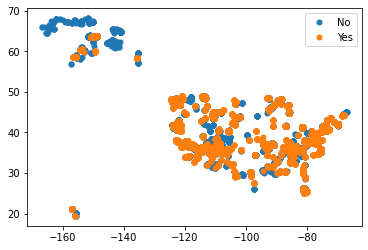

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('AssessScale')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

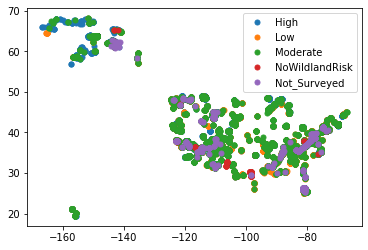

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('Rating')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

In [ ]:
# %% Checking the data type
#print(df.dtypes)
print(df.shape)
df.drop(df.columns[26],axis=1,inplace=True)
df.drop(df.columns[7],axis=1,inplace=True)
df.drop(df.columns[8],axis=1,inplace=True)

print(df.shape)

(30105, 37)
(30105, 34)


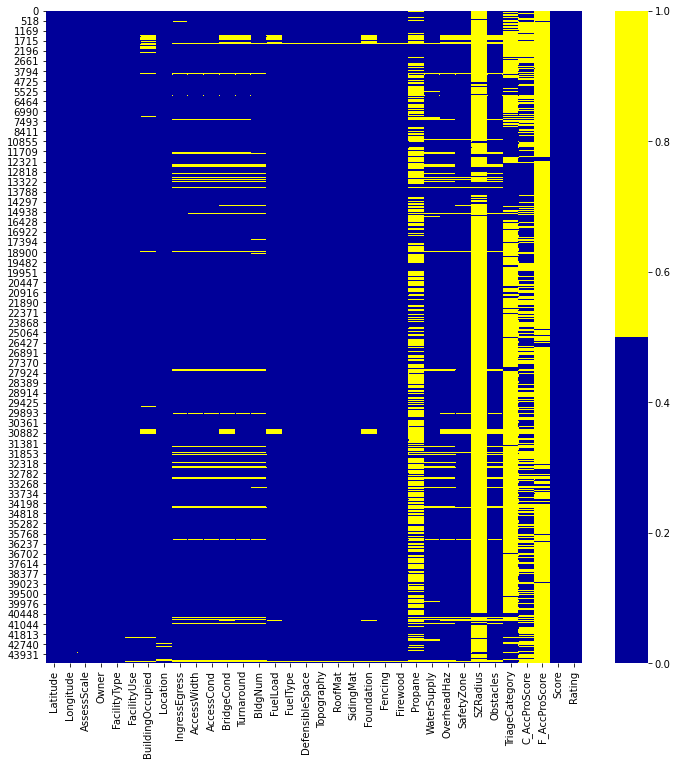

In [ ]:
# %% Missing Data Heatmap
plt.figure(figsize=(12,12))
cols = df.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# %% # 
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))

        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: AssessScale
imputing missing values for: Owner
imputing missing values for: FacilityType
imputing missing values for: FacilityUse
imputing missing values for: BuildingOccupied
imputing missing values for: Location
imputing missing values for: TriageCategory


In [ ]:
 # %% Converting all the categorical variables into numerical ones in the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
print(df.dtypes)

df.head(5)

Latitude            float64
Longitude           float64
AssessScale           int32
Owner                 int32
FacilityType          int32
FacilityUse           int32
BuildingOccupied      int32
Location              int32
IngressEgress       float64
AccessWidth         float64
AccessCond          float64
BridgeCond          float64
Turnaround          float64
BldgNum             float64
FuelLoad            float64
FuelType            float64
DefensibleSpace     float64
Topography          float64
RoofMat             float64
SidingMat           float64
Foundation          float64
Fencing             float64
Firewood            float64
Propane             float64
WaterSupply         float64
OverheadHaz         float64
SafetyZone          float64
SZRadius            float64
Obstacles           float64
TriageCategory        int32
C_AccProScore       float64
F_AccProScore       float64
Score               float64
Rating                int32
dtype: object


Latitude   Longitude  AssessScale  Owner  FacilityType  FacilityUse  \
0  32.183823 -110.592244            0      5             5            6   
2  32.994448 -111.537037            1      5             9            6   
3  32.995553 -111.536253            1      5             9            6   
4  32.995787 -111.536455            1      5             9            6   
5  32.994172 -111.536518            1      5             1            0   

   BuildingOccupied  Location  IngressEgress  AccessWidth  ...  WaterSupply  \
0                 0       920            7.0          4.0  ...         10.0   
2                 0       121            6.0          2.0  ...          0.0   
3                 0       121            6.0          2.0  ...          0.0   
4                 0       121            6.0          2.0  ...          0.0   
5                 1       121            6.0          2.0  ...          0.0   

   OverheadHaz  SafetyZone  SZRadius  Obstacles  TriageCategory  \
0          0.0         3.0       NaN        0.0               1   
2          0.0         0.0       NaN        0.0               1   
3          0.0         0.0       NaN        0.0               1   
4          0.0         0.0       NaN        0.0               1   
5          0.0         0.0       NaN        0.0               1   

   C_AccProScore  F_AccProScore  Score  Rating  
0            NaN            NaN   89.0       0  
2            8.0            NaN   47.0       2  
3            8.0            NaN   15.0       1  
4            8.0            NaN   15.0       1  
5            8.0            NaN   21.0       1  

[5 rows x 34 columns]

In [ ]:
df.shape

(30105, 34)

In [ ]:
# %% # impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
     
        med = df[col].median()
        df[col] = df[col].fillna(med)



imputing missing values for: IngressEgress
imputing missing values for: AccessWidth
imputing missing values for: AccessCond
imputing missing values for: BridgeCond
imputing missing values for: Turnaround
imputing missing values for: BldgNum
imputing missing values for: FuelLoad
imputing missing values for: FuelType
imputing missing values for: DefensibleSpace
imputing missing values for: Topography
imputing missing values for: RoofMat
imputing missing values for: SidingMat
imputing missing values for: Foundation
imputing missing values for: Fencing
imputing missing values for: Firewood
imputing missing values for: Propane
imputing missing values for: WaterSupply
imputing missing values for: OverheadHaz
imputing missing values for: SafetyZone
imputing missing values for: SZRadius
imputing missing values for: Obstacles
imputing missing values for: C_AccProScore
imputing missing values for: F_AccProScore


In [ ]:

# %% Checking the data type
print(df.dtypes)
df.shape

Latitude            float64
Longitude           float64
AssessScale           int32
Owner                 int32
FacilityType          int32
FacilityUse           int32
BuildingOccupied      int32
Location              int32
IngressEgress       float64
AccessWidth         float64
AccessCond          float64
BridgeCond          float64
Turnaround          float64
BldgNum             float64
FuelLoad            float64
FuelType            float64
DefensibleSpace     float64
Topography          float64
RoofMat             float64
SidingMat           float64
Foundation          float64
Fencing             float64
Firewood            float64
Propane             float64
WaterSupply         float64
OverheadHaz         float64
SafetyZone          float64
SZRadius            float64
Obstacles           float64
TriageCategory        int32
C_AccProScore       float64
F_AccProScore       float64
Score               float64
Rating                int32
dtype: object


(30105, 34)

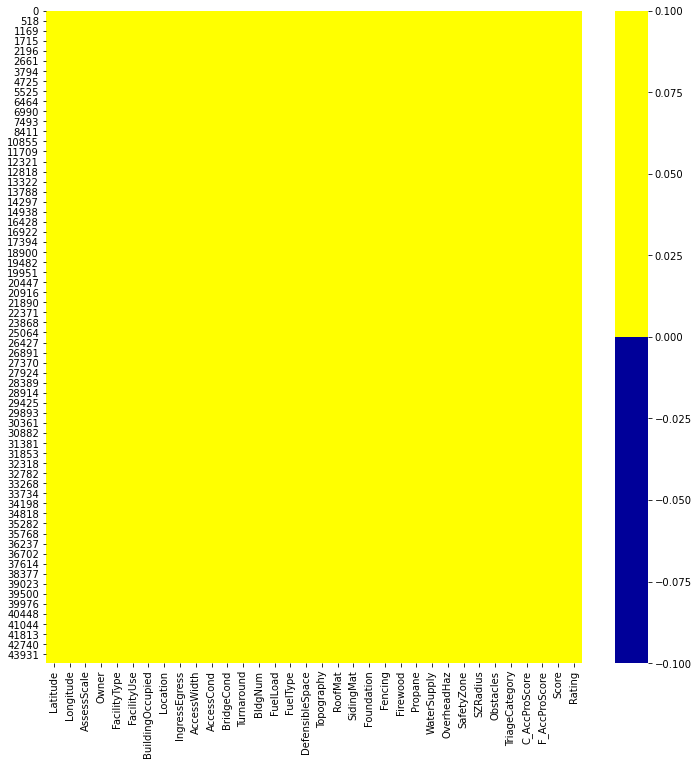

In [ ]:
# %% Missing Data Heatmap
plt.figure(figsize=(12,12))
cols = df.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

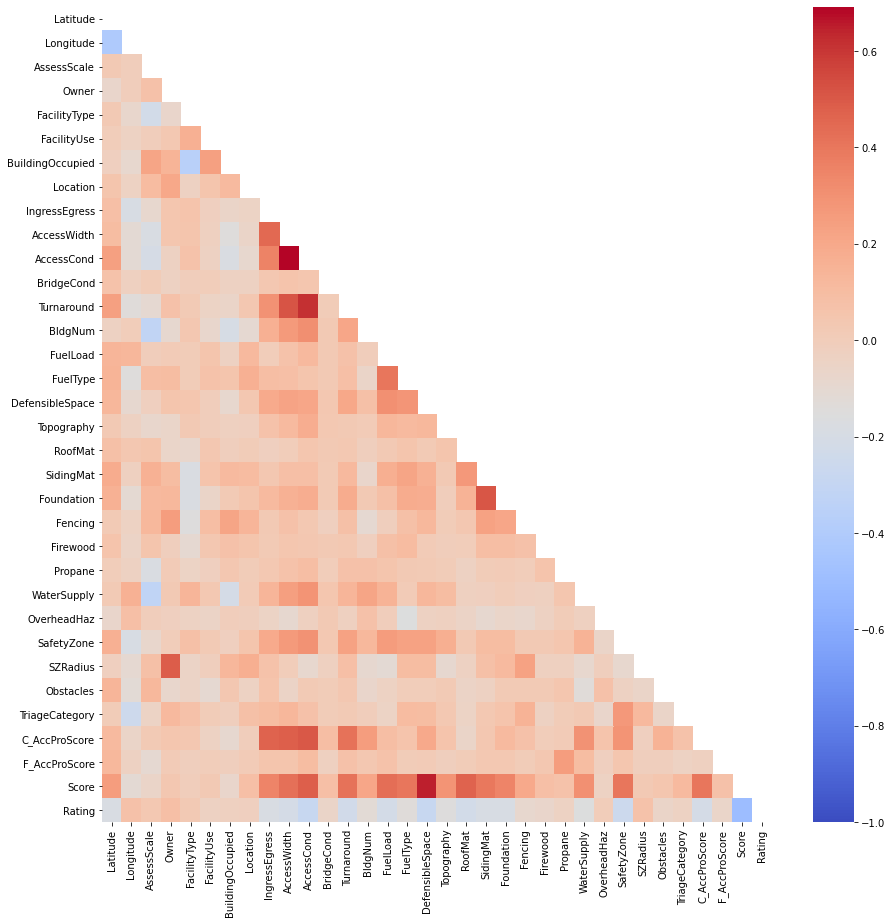

In [ ]:
# %% # # %% # %% # Visualizing the correlation matrix and Heatmap
plt.figure(figsize=(15,15))
mask = np.zeros_like(df[cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[cols].corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=False,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [ ]:
# %% ### Model Lasso regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, df.iloc[:, :32], df.iloc[:, 33],
                                   scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

model_lasso = LassoCV(alphas = [0.0005, 0.001, 0.1, 1]).fit( df.iloc[:, :32], df.iloc[:, 33])
print(rmse_cv(model_lasso).mean())

0.8575574015894191


In [ ]:
# %% ### Model Lasso regression (l1):: Select features
coef = pd.Series(model_lasso.coef_, index = df.columns[:32])
print(coef.head)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " 
      +  str(sum(coef == 0)) + " variables")

<bound method NDFrame.head of Latitude           -0.006062
Longitude           0.000394
AssessScale         0.000000
Owner               0.075228
FacilityType        0.001685
FacilityUse        -0.003568
BuildingOccupied   -0.173217
Location           -0.000021
IngressEgress      -0.022806
AccessWidth         0.016191
AccessCond         -0.037131
BridgeCond         -0.041504
Turnaround         -0.042329
BldgNum            -0.022061
FuelLoad           -0.025315
FuelType            0.008885
DefensibleSpace    -0.019197
Topography         -0.020394
RoofMat            -0.018271
SidingMat          -0.017664
Foundation         -0.052814
Fencing            -0.020175
Firewood           -0.040282
Propane             0.000000
WaterSupply        -0.022636
OverheadHaz        -0.030997
SafetyZone         -0.077590
SZRadius            0.000370
Obstacles          -0.041695
TriageCategory     -0.003275
C_AccProScore      -0.002325
F_AccProScore      -0.004315
dtype: float64>
Lasso picked 30 variables 

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

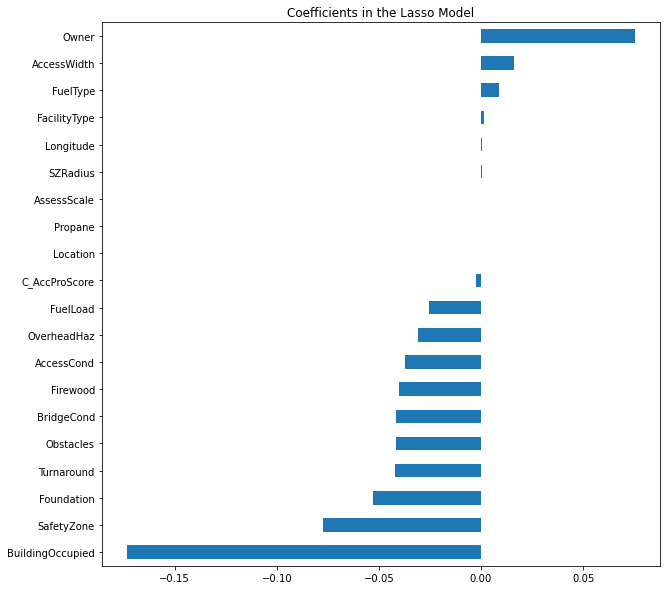

In [ ]:
# %% Print feature selection

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

F_AccProScore       0.001762
BridgeCond          0.003160
Propane             0.003266
TriageCategory      0.005668
SZRadius            0.005912
OverheadHaz         0.006007
Firewood            0.006771
Obstacles           0.007631
Owner               0.008788
BuildingOccupied    0.008960
AssessScale         0.009001
BldgNum             0.013696
FacilityType        0.013771
Fencing             0.017468
FacilityUse         0.020822
IngressEgress       0.022159
SafetyZone          0.023723
Foundation          0.024602
Turnaround          0.024928
Topography          0.026351
WaterSupply         0.032688
FuelType            0.033463
AccessWidth         0.033989
SidingMat           0.046110
FuelLoad            0.047599
Location            0.047672
AccessCond          0.048303
C_AccProScore       0.058879
Latitude            0.070863
Longitude           0.071593
RoofMat             0.099353
DefensibleSpace     0.155042
dtype: float64


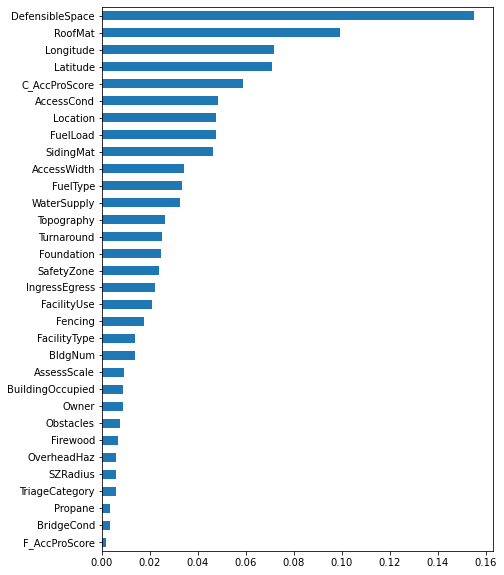

In [ ]:
# %%% ### # Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1111
test_scores, train_scores = [], []
for i in [1,3,5,7,10,20,25,30,60,80]:
      rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
      rfc=rfc.fit(df.iloc[:, :32], df.iloc[:, 33]) # print(rfc)
# Create a pd.Series of features importances
importances_rf = pd.Series(rfc.feature_importances_, index = df.columns[:32])
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
print(sorted_importances_rf)
# Make a horizontal bar plot
plt.figure(figsize=(7,10))
sorted_importances_rf.plot(kind='barh'); 

In [ ]:

# %% Cumilative feature improtance from RFC
print(sorted_importances_rf.shape)
sorted_importances_rf_1 = importances_rf.sort_values(ascending=False)
df_1=sorted_importances_rf_1.to_frame()

# # List of features sorted from most to least important
# sorted_importances = importances_rf.reset_index(drop=True, inplace=True)
df_1 = df_1.rename_axis('Index')
print(df_1)
df_1['id'] = list(df_1.index)
sorted_features = df_1['id']
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances_rf_1)


(32,)
                         0
Index                     
DefensibleSpace   0.155042
RoofMat           0.099353
Longitude         0.071593
Latitude          0.070863
C_AccProScore     0.058879
AccessCond        0.048303
Location          0.047672
FuelLoad          0.047599
SidingMat         0.046110
AccessWidth       0.033989
FuelType          0.033463
WaterSupply       0.032688
Topography        0.026351
Turnaround        0.024928
Foundation        0.024602
SafetyZone        0.023723
IngressEgress     0.022159
FacilityUse       0.020822
Fencing           0.017468
FacilityType      0.013771
BldgNum           0.013696
AssessScale       0.009001
BuildingOccupied  0.008960
Owner             0.008788
Obstacles         0.007631
Firewood          0.006771
OverheadHaz       0.006007
SZRadius          0.005912
TriageCategory    0.005668
Propane           0.003266
BridgeCond        0.003160
F_AccProScore     0.001762


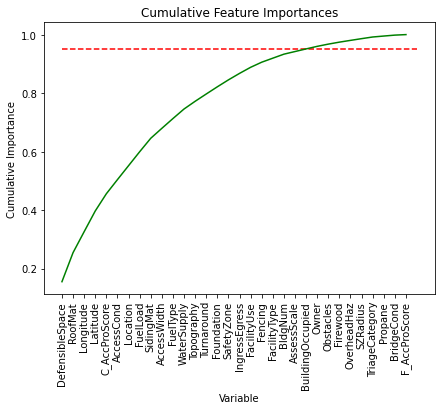

In [ ]:
# Make a line graph
# list of x locations for plotting
x_values = list(range(len(sorted_importances_rf_1)))
plt.figure(figsize=(7,5))
plt.plot(x_values, cumulative_importances, 'g-')


# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances_rf_1), 
            color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); 
plt.ylabel('Cumulative Importance'); 
plt.title('Cumulative Feature Importances');

In [ ]:
X_1 = df.drop(['Score', 'Rating'], axis = 1)
y = df['Rating']

In [ ]:
# %% # Normalization of the feature variables

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_1=normalize(X_1)
X_1.head()

Latitude  Longitude  AssessScale     Owner  FacilityType  FacilityUse  \
0  0.262004   0.564054          0.0  0.416667      0.384615     0.857143   
2  0.278641   0.554577          1.0  0.416667      0.692308     0.857143   
3  0.278663   0.554584          1.0  0.416667      0.692308     0.857143   
4  0.278668   0.554582          1.0  0.416667      0.692308     0.857143   
5  0.278635   0.554582          1.0  0.416667      0.076923     0.000000   

   BuildingOccupied  Location  IngressEgress  AccessWidth  ...  Firewood  \
0               0.0  0.760331       1.000000          1.0  ...       0.0   
2               0.0  0.100000       0.857143          0.5  ...       0.0   
3               0.0  0.100000       0.857143          0.5  ...       0.0   
4               0.0  0.100000       0.857143          0.5  ...       0.0   
5               1.0  0.100000       0.857143          0.5  ...       0.0   

   Propane  WaterSupply  OverheadHaz  SafetyZone  SZRadius  Obstacles  \
0      0.0          1.0          0.0         1.0  0.200799        0.0   
2      0.0          0.0          0.0         0.0  0.200799        0.0   
3      0.0          0.0          0.0         0.0  0.200799        0.0   
4      0.0          0.0          0.0         0.0  0.200799        0.0   
5      0.0          0.0          0.0         0.0  0.200799        0.0   

   TriageCategory  C_AccProScore  F_AccProScore  
0        0.333333       0.333333            0.0  
2        0.333333       0.177778            0.0  
3        0.333333       0.177778            0.0  
4        0.333333       0.177778            0.0  
5        0.333333       0.177778            0.0  

[5 rows x 32 columns]

In [ ]:
# %% # split data into X and y
SEED=1234
random.seed(SEED)
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, train_size=0.75, random_state=1)


In [ ]:
print(df['Rating'].value_counts())

0    10594
2     9823
1     8639
4      822
3      227
Name: Rating, dtype: int64


In [ ]:
# %%
test_scores, train_scores = [], []
for i in [1,5,10,20,60,120, 160, 320, 400, 450, 500]:
      rfc = RandomForestClassifier(n_estimators=i, random_state=1111, max_depth=16, max_features="sqrt")
      rfc=rfc.fit(X_1_train, y_train) # print(rfc)
      train_predictions = rfc.predict(X_1_train)
      test_predictions = rfc.predict(X_1_test)
      train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
      test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The maximum training score from RF is: {}".format(max(train_scores)))
print("The maximum testing scores from RF is: {}".format(max(test_scores)))
# %%



The maximum training score from RF is: 0.99
The maximum testing scores from RF is: 0.91


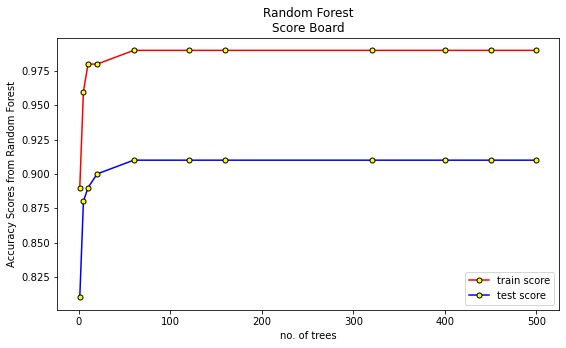

In [ ]:
z = [1,5,10,20,60,120, 160, 320, 400, 450, 500]
plt.figure(figsize=(9,5))
plt.plot(z, train_scores,  'r',  marker='o', markersize=5, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='k')
plt.plot(z, test_scores, 'b', marker='o', markersize=5, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='k')
plt.legend(['train score', 'test score'], loc='lower right')
plt.xlabel('no. of trees')
plt.ylabel('Accuracy Scores from Random Forest')
plt.title('Random Forest\nScore Board')
plt.show()

In [ ]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2584
           1       0.93      0.93      0.93      2205
           2       0.87      0.89      0.88      2458
           3       1.00      0.65      0.79        65
           4       0.99      0.78      0.87       215

    accuracy                           0.91      7527
   macro avg       0.95      0.84      0.88      7527
weighted avg       0.91      0.91      0.91      7527



In [ ]:
confusion_matrix(y_test, test_predictions)

array([[2439,    3,  141,    0,    1],
       [   5, 2050,  150,    0,    0],
       [ 151,  128, 2179,    0,    0],
       [   5,   11,    7,   42,    0],
       [   8,   24,   16,    0,  167]], dtype=int64)

In [ ]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features="sqrt",
                               oob_score=True,
                               random_state=SEED)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=SEED)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=SEED))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)



In [ ]:
ensemble_clfs

[("RandomForestClassifier, max_features='sqrt'",
  RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=1234,
                         warm_start=True)),
 ("RandomForestClassifier, max_features='log2'",
  RandomForestClassifier(max_features='log2', oob_score=True, random_state=1234,
                         warm_start=True)),
 ('RandomForestClassifier, max_features=None',
  RandomForestClassifier(max_features=None, oob_score=True, random_state=1234,
                         warm_start=True))]

In [ ]:
# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_1_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to co

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to co

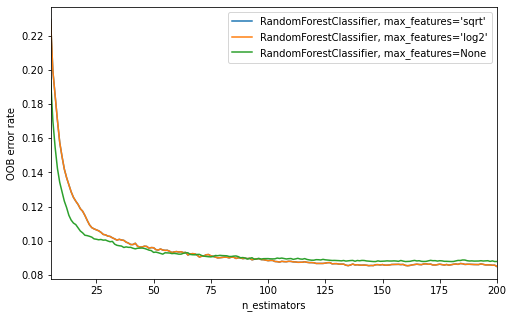

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(8,5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)


plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# %% ### Extreme Gradient Boosting with XGBoost ###
random.seed(SEED)
# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(objective ='multi:softprob', colsample_bytree = 0.3, 
                            learning_rate = 0.5, max_depth = 16, alpha = 10, n_estimators = 500)
xgb_clf.fit(X_1_train, y_train)
# Applying classifier on train (seen) set
predictions_1 = xgb_clf.predict(X_1_train)
# Applying classifier on test (unseen) set
predictions_2 = xgb_clf.predict(X_1_test)


# print accuracy
print("XGB Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, predictions_2)))
print("XGB Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, predictions_1)))


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy test: 0.93
XGB Accuracy train: 0.97


In [ ]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2584
           1       0.95      0.94      0.95      2205
           2       0.90      0.92      0.91      2458
           3       0.94      0.68      0.79        65
           4       0.95      0.85      0.90       215

    accuracy                           0.93      7527
   macro avg       0.94      0.87      0.90      7527
weighted avg       0.93      0.93      0.93      7527



In [ ]:
confusion_matrix(y_test, predictions_2)

array([[2463,    4,  115,    0,    2],
       [   2, 2074,  122,    2,    5],
       [ 113,   76, 2268,    0,    1],
       [   4,   13,    3,   44,    1],
       [   8,   14,    9,    1,  183]], dtype=int64)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y_train)
# grid search
model_xgb = XGBClassifier()
learning_rate = [0.001, 0.01, 0.1, 0.4, 0.6, 1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_1_train, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.187240 using {'learning_rate': 0.4}
-1.478490 (0.000879) with: {'learning_rate': 0.001}
-0.865376 (0.005209) with: {'learning_rate': 0.01}
-0.262174 (0.006292) with: {'learning_rate': 0.1}
-0.187240 (0.008904) with: {'learning_rate': 0.4}
-0.190849 (0.009664) with: {'learning_rate': 0.6}
-0.210535 (0.012332) with: {'learning_rate': 1}


In [ ]:
label_encoded_y = LabelEncoder().fit_transform(y_train)
label_encoded_y

array([1, 3, 2, ..., 2, 2, 0], dtype=int64)

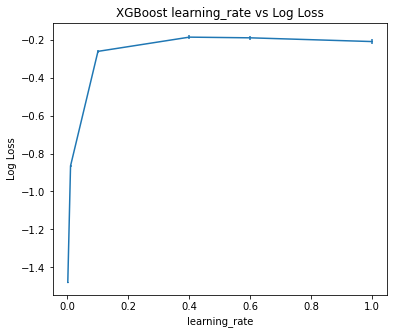

In [ ]:
# plot
plt.figure(figsize=(6,5))
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.show()

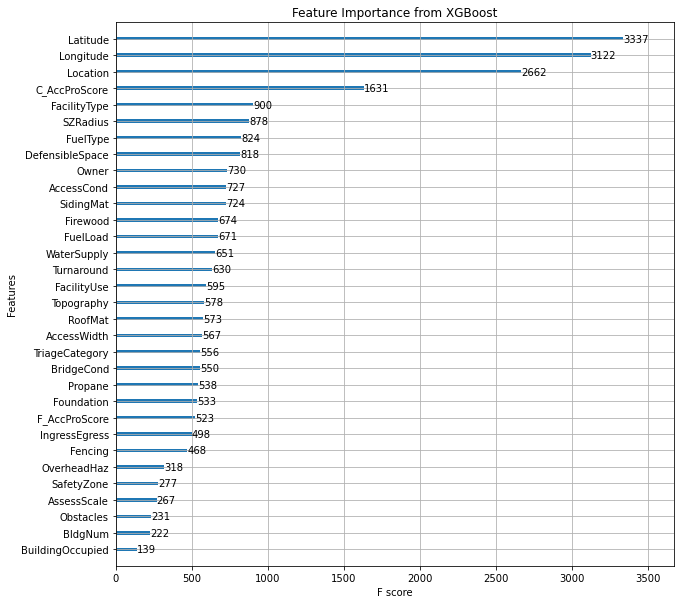

In [ ]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [7, 14]
plt.title("Feature Importance from XGBoost")
plt.show()

In [ ]:
# %% ### DecisionTreeClassifier ###
random.seed(SEED)
from sklearn.tree import DecisionTreeClassifier
# Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(X_1, y, train_size=0.8, random_state=1)
model = DecisionTreeClassifier(max_depth=16, random_state=1)

# Fit model to the training set
clf=model.fit(X_1_train, y_train)

# Compute y_pred
ydt_predict_train = model.predict(X_1_train)
ydt_predict_test = model.predict(X_1_test)

# print accuracy
print("DT_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, ydt_predict_test)))
print("DT_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, ydt_predict_train)))


DT_Accuracy test: 0.87
DT_Accuracy train: 0.98


In [ ]:
print(classification_report(y_test, ydt_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2584
           1       0.89      0.90      0.89      2205
           2       0.82      0.82      0.82      2458
           3       0.78      0.71      0.74        65
           4       0.83      0.76      0.80       215

    accuracy                           0.87      7527
   macro avg       0.85      0.82      0.83      7527
weighted avg       0.87      0.87      0.87      7527



In [ ]:
confusion_matrix(y_test, ydt_predict_test)

array([[2345,   19,  209,    2,    9],
       [   9, 1984,  195,    6,   11],
       [ 217,  201, 2023,    5,   12],
       [   4,    9,    5,   46,    1],
       [   7,   20,   24,    0,  164]], dtype=int64)

In [ ]:
# %% # Implement knn classifier #####

# %% # Calculating error for K values between 1 and 25.

error , error_tr = [], []

# z = [1,3,5,7, 9, 11, 13, 15]
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_1_train, y_train)
    pred_i = knn.predict(X_1_test)
    pred_i_tr = knn.predict(X_1_train)
    error.append(np.mean(pred_i != y_test)*100)
    error_tr.append(np.mean(pred_i_tr != y_train)*100)


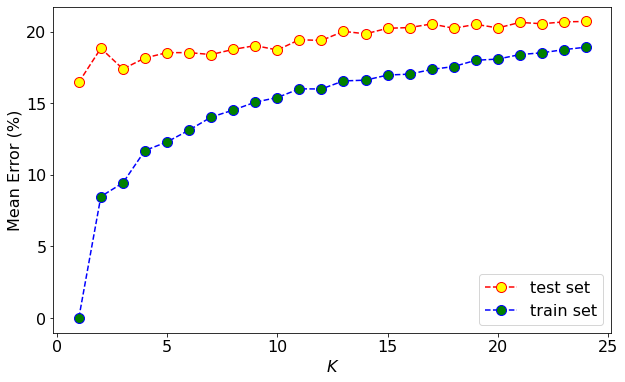

In [ ]:
### plotting KNN accuraces for train and test ####
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), error,  color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.plot(range(1, 25), error_tr,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
#plt.title('Error Rate in K Value', fontsize=16)
plt.xlabel(r'$K$', fontsize=16)
plt.ylabel('Mean Error (%)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['test set', 'train set'], loc='best', fontsize=16)


In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_1_train, y_train)
#Predict the response for rain dataset
yknn_pred_train = knn.predict(X_1_train)
#Predict the response for test dataset
yknn_pred_test = knn.predict(X_1_test)

# print accuracy
print("KNN_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, yknn_pred_test)))
print("KNN_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, yknn_pred_train)))


KNN_Accuracy test: 0.84
KNN_Accuracy train: 1.00


In [ ]:
print(classification_report(y_test, yknn_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2584
           1       0.84      0.87      0.86      2205
           2       0.78      0.76      0.77      2458
           3       0.71      0.57      0.63        65
           4       0.80      0.85      0.82       215

    accuracy                           0.84      7527
   macro avg       0.80      0.79      0.79      7527
weighted avg       0.83      0.84      0.83      7527



In [ ]:
confusion_matrix(y_test, yknn_pred_test)

array([[2277,   21,  271,    1,   14],
       [  14, 1918,  245,   11,   17],
       [ 268,  302, 1873,    3,   12],
       [   4,   16,    5,   37,    3],
       [  10,   17,    6,    0,  182]], dtype=int64)

In [ ]:
# %% ################# AdaBoost Classifier ####################

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=16, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=300)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_1_train, y_train)
# Predict the train set 
yada_pred_train = adb_clf.predict(X_1_train)
# Predict the test set 
yada_pred_test = adb_clf.predict(X_1_test)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_1_test)[:,1]

# print accuracy
print("Adb_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, yada_pred_test)))
print("Adb_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, yada_pred_train)))


Adb_Accuracy test: 0.91
Adb_Accuracy train: 1.00


In [ ]:
print(classification_report(y_test, yada_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2584
           1       0.93      0.93      0.93      2205
           2       0.86      0.89      0.88      2458
           3       1.00      0.74      0.85        65
           4       0.98      0.87      0.93       215

    accuracy                           0.91      7527
   macro avg       0.94      0.87      0.90      7527
weighted avg       0.91      0.91      0.91      7527



In [ ]:
confusion_matrix(y_test, yada_pred_test)

array([[2404,    3,  176,    0,    1],
       [   2, 2041,  162,    0,    0],
       [ 147,  121, 2188,    0,    2],
       [   5,    9,    3,   48,    0],
       [   5,   10,   12,    0,  188]], dtype=int64)

In [ ]:
# Instantiate a classification-tree 'dt' BaggingClassifier ###
dt1 = DecisionTreeClassifier(max_depth=16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt1, n_estimators=500, n_jobs=-1) 
# n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_1_train, y_train)

# Predict train set labels
ybc_pred_train = bc.predict(X_1_train)

# Predict test set labels
ybc_pred_test = bc.predict(X_1_test)

# print accuracy
print("bagclass_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, ybc_pred_test)))
print("bagclass_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, ybc_pred_train)))


bagclass_Accuracy test: 0.91
bagclass_Accuracy train: 0.99


In [ ]:
print(classification_report(y_test, ybc_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2584
           1       0.93      0.93      0.93      2205
           2       0.87      0.89      0.88      2458
           3       0.85      0.71      0.77        65
           4       0.97      0.78      0.86       215

    accuracy                           0.91      7527
   macro avg       0.91      0.85      0.88      7527
weighted avg       0.91      0.91      0.91      7527



In [ ]:
confusion_matrix(y_test, ybc_pred_test)

array([[2433,    4,  145,    0,    2],
       [   7, 2043,  146,    6,    3],
       [ 138,  127, 2190,    2,    1],
       [   5,   11,    3,   46,    0],
       [   5,   21,   21,    0,  168]], dtype=int64)

In [ ]:
### fitting SVM on training set ###
from sklearn import svm, datasets
linear = svm.SVC(kernel='linear', C=1).fit(X_1_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=.5, C=1, decision_function_shape='ovo').fit(X_1_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_1_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_1_train, y_train)

In [ ]:
linear_pred = linear.predict(X_1_test)
poly_pred = poly.predict(X_1_test)
rbf_pred = rbf.predict(X_1_test)
sig_pred = sig.predict(X_1_test)



In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_1_test, y_test)
accuracy_poly = poly.score(X_1_test, y_test)
accuracy_rbf = rbf.score(X_1_test, y_test)
accuracy_sig = sig.score(X_1_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.868074930251096
Accuracy Polynomial Kernel: 0.9044772153580444
Accuracy Radial Basis Kernel: 0.9112528231699216
Accuracy Sigmoid Kernel: 0.2569416766307958


In [ ]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

[[2394    6  184    0    0]
 [  17 1998  183    0    7]
 [ 197  158 2097    0    6]
 [   6   47   11    0    1]
 [  37   98   35    0   45]]


In [ ]:
cm_poly = confusion_matrix(y_test, poly_pred)
print(cm_poly)


[[2418    4  161    0    1]
 [   4 2044  154    0    3]
 [ 132  139 2186    0    1]
 [   6   31    3   24    1]
 [  13   43   23    0  136]]


In [ ]:
cm_rbf = confusion_matrix(y_test, rbf_pred)
print(cm_rbf)

[[2430    2  151    0    1]
 [   5 2038  157    0    5]
 [ 144  109 2205    0    0]
 [   5   21    6   31    2]
 [  12   26   22    0  155]]


In [ ]:
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_sig)

[[1076 1222  286    0    0]
 [1382  795   26    0    2]
 [1632  767   59    0    0]
 [  44   18    3    0    0]
 [  81  126    4    0    4]]
